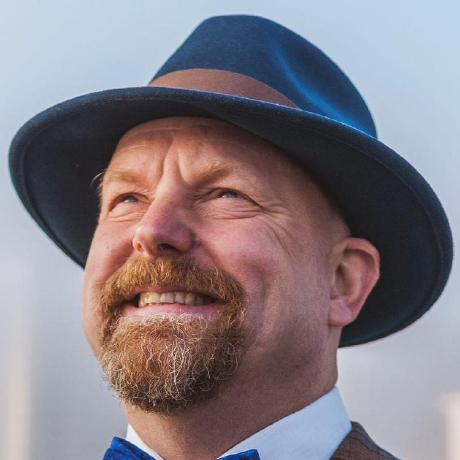

Name                       Size    Contributors Count  Branch    Is Protected
-----------------------  ------  --------------------  --------  --------------
codingitwrong.github.io    3775                     1  master    False
CrowdBall                    96                     1  master    False
dramatiq                   2658                    68  master    False
druntime                  14939                    86  master    False
excalidraw                 5161                    70  master    False
IncentivesForGeeks            0                     1  main      False
KentBeck                      2                     1  main      False
Moire                        48                     1  ---       ---
Multihash-                   48                     1  ---       ---
MVM                           0                     1  master    False
poker_table                 615                     2  main      False
Prune                       116                     1  master    

In [1]:
import requests
from IPython.display import display
from PIL import Image
from io import BytesIO
import tabulate

USERNAME = ''
ACCESS_KEY = ''
GITAPIURL = 'https://api.github.com/'
ERRORS = False


tableHeaders = ['Name', 'Size', 'Contributors Count', 'Branch', 'Is Protected']
table = []

headers = {'Authorization': 'token ' + ACCESS_KEY}

s = requests.Session()
s.headers.update(headers)

query = GITAPIURL + 'users/' +  USERNAME + '/repos' + '?per_page=100&page=1'
repos_res = s.get(query)

if repos_res.status_code == 200:
    repos = repos_res.json()

    while 'next' in repos_res.links.keys():
        repos_res = s.get(repos_res.links['next']['url'])
        if repos_res.status_code == 200:
            repos.extend(repos_res.json())

    for repo in repos:
                
        query = GITAPIURL + 'repos/' + USERNAME + '/' + repo['name'] + '/branches/' + repo['default_branch']
        branches = s.get(query)
        if branches.status_code == 200:
            branches = branches.json()

            protected = branches['protected']
            default_branch = branches['name']
        else:
            protected = '---'
            default_branch = '---'
            if ERRORS: print('branch, Error: ' + str(branches.status_code))

        query = GITAPIURL + 'repos/' + USERNAME + '/' + repo['name'] + '/contributors' + '?per_page=1&page=1'
        contributors_res = s.get(query)
  
        if contributors_res.status_code == 200:
            if 'last' in contributors_res.links.keys():
                contributors = contributors_res.links['last']['url'].split('page=')[-1]
            else:
                contributors = 1
        else:
            if ERRORS: print('contr, Error: ' + str(contributors_res.status_code))


        table.append([
            repo['name'],
            repo['size'],
            contributors,
            default_branch,
            protected
        ])

else:
    if ERRORS: print('repos, Error: ' + str(repos_res.status_code))

query = GITAPIURL + 'users/' +  USERNAME
user_res = s.get(query)
user = user_res.json()
avatar_url = user['avatar_url']
req = s.get(avatar_url)
img = Image.open(BytesIO(req.content))

s.close()

display(img)
print(tabulate.tabulate(table, headers=tableHeaders))
